In [1]:
# Imports
import os
import sys
import cmath
import math
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import sympy as sp
from sympy.utilities.lambdify import lambdify
from scipy import signal
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from matplotlib.ticker import LogLocator
import control
import matplotlib.patches as pch

In [2]:
sink = pd.read_csv('/home/kegedy/Documents/EE473/Project3/StabilityISink.csv')

In [3]:
source = pd.read_csv('/home/kegedy/Documents/EE473/Project3/StabilityISource.csv')
transient = pd.read_csv('/home/kegedy/Documents/EE473/Project3/SinkElectrodeTransient.csv')

In [4]:
x0 = np.where(sink['Loop Gain dB20 Y']<=0)[0][0]-1
gwc = sink.iloc[x0]['Loop Gain dB20 X']
pm = sink.iloc[x0]['Loop Gain Phase Y']
gwc,pm

(100000000.0000003, 61.48019929851989)

In [5]:
x1 = np.where(source['Loop Gain dB20 Y']<=0)[0][0]
gwc2 = source.iloc[x1]['Loop Gain dB20 X']
pm2 = source.iloc[x1]['Loop Gain Phase Y']
gwc2, pm2

(39810717.05534985, 67.34683429682076)

In [6]:
source.head()

,Loop Gain dB20 X,Loop Gain dB20 Y,Loop Gain Phase X,Loop Gain Phase Y
0,1.000000,68.459189,1.000000,179.996368
1,1.584893,68.459188,1.584893,179.994243
2,2.511886,68.459188,2.511886,179.990876
3,3.981072,68.459188,3.981072,179.985540
4,6.309573,68.459188,6.309573,179.977082


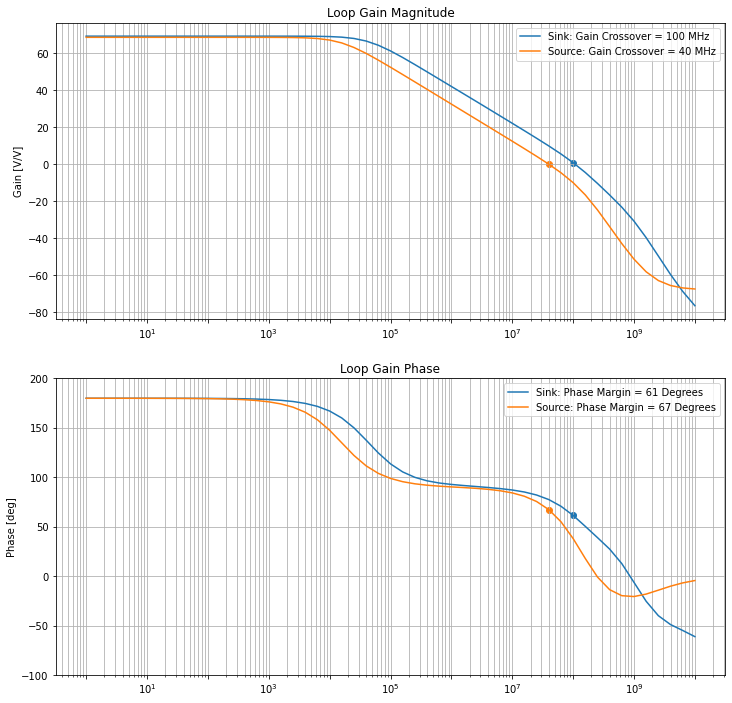

In [7]:
fig, ax = plt.subplots(2,1,figsize=(12,12))

ax[0].set_title(f'Loop Gain Magnitude')
ax[0].semilogx(sink['Loop Gain dB20 X'],sink['Loop Gain dB20 Y'],label=f'Sink: Gain Crossover = {round(gwc/1E6)} MHz')
ax[0].semilogx(source['Loop Gain dB20 X'],source['Loop Gain dB20 Y'],label=f'Source: Gain Crossover = {round(gwc2/1E6)} MHz')
#ax[0].semilogx(mag['Loop Gain dB20 X'],mag.iloc[x0]['Loop Gain dB20 Y']*np.ones(len(mag)),color='tab:red',label=f'Gain Crossover')
ax[0].scatter(sink.iloc[x0]['Loop Gain dB20 X'],sink.iloc[x0]['Loop Gain dB20 Y'],color='tab:blue')
ax[0].scatter(source.iloc[x1]['Loop Gain dB20 X'],source.iloc[x1]['Loop Gain dB20 Y'],color='tab:orange')

ax[0].set_ylabel('Gain [V/V]')
ax[0].grid(which='both', axis='both')
ax[0].legend();

ax[1].set_title(r'Loop Gain Phase')
ax[1].semilogx(sink['Loop Gain Phase X'],sink['Loop Gain Phase Y'],label=f'Sink: Phase Margin = {round(pm)} Degrees')
ax[1].semilogx(source['Loop Gain Phase X'],source['Loop Gain Phase Y'],label=f'Source: Phase Margin = {round(pm2)} Degrees')
#ax[1].semilogx(phase['Loop Gain Phase X'],phase.iloc[x0]['Loop Gain Phase Y']*np.ones(len(mag)),color='tab:red',label=f'Gain Crossover')
ax[1].scatter(sink.iloc[x0]['Loop Gain Phase X'],sink.iloc[x0]['Loop Gain Phase Y'],color='tab:blue')
ax[1].scatter(source.iloc[x1]['Loop Gain Phase X'],source.iloc[x1]['Loop Gain Phase Y'],color='tab:orange')
ax[1].set_ylabel('Phase [deg]')
ax[1].set_ylim([-100,200])
ax[1].grid(which='both', axis='both')
ax[1].legend();

ax[0].xaxis.set_major_locator(LogLocator(numticks=15))
ax[0].xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10)))
for label in ax[0].xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
    
ax[1].xaxis.set_major_locator(LogLocator(numticks=15))
ax[1].xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10)))
for label in ax[1].xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
plt.show();

In [8]:
elect_waveform  = pd.read_csv('/home/kegedy/Documents/EE473/Project3/FullDesignVoltage.csv')

In [9]:
elect_waveform.head()

,/Vout X,/Vout Y
0,0.000000,0.931585
1,0.000010,0.931573
2,0.000030,0.931568
3,0.000070,0.931558
4,0.000136,0.931543


In [10]:
elect_charge = pd.read_csv('/home/kegedy/Documents/EE473/Project3/IntegralOfOutputCurrent.csv')

In [90]:
elect_curr = pd.read_csv('/home/kegedy/Documents/EE473/Project3/CurrentWaveformFull.csv')

In [91]:
elect_curr.head()

,/V9/PLUS X,/V9/PLUS Y
0,0.000000,-3.184151e-10
1,0.000010,-8.744734e-09
2,0.000030,-8.306489e-09
3,0.000070,-7.502174e-09
4,0.000136,-6.416732e-09


In [12]:
mmed = np.median(elect_waveform['/Vout Y'][400:])
mmax = np.max(elect_waveform['/Vout Y'][400:])
mmin = np.min(elect_waveform['/Vout Y'][400:])

In [12]:
mmed = np.median(elect_waveform['/Vout Y'][400:])
mmax = np.max(elect_waveform['/Vout Y'][400:])
mmin = np.min(elect_waveform['/Vout Y'][400:])

In [82]:
mmax - mmin

0.4138069614956199

In [76]:
x = elect_charge['iinteg(i("/R1/PLUS" ?result "tran")) X'].to_numpy()
y = elect_charge['iinteg(i("/R1/PLUS" ?result "tran")) Y'].to_numpy()
x0 = 202
charge0 = round(y[x0]*1e9,4)
xtest = np.where(y>=y[x0])[0]
xtest
x1 = 322
charge1 = round(y[x1]*1e9,4)
x2 = 440
charge2 = round(y[x2]*1e9,4)

array([ 201,  202,  317,  318,  319,  320,  321,  322,  436,  437,  438,
        439,  440,  441,  556,  557,  558,  559,  560,  675,  676,  677,
        678,  679,  680,  794,  795,  796,  797,  798,  799,  913,  914,
        915,  916,  917,  918, 1032, 1033, 1034, 1035, 1036, 1037])

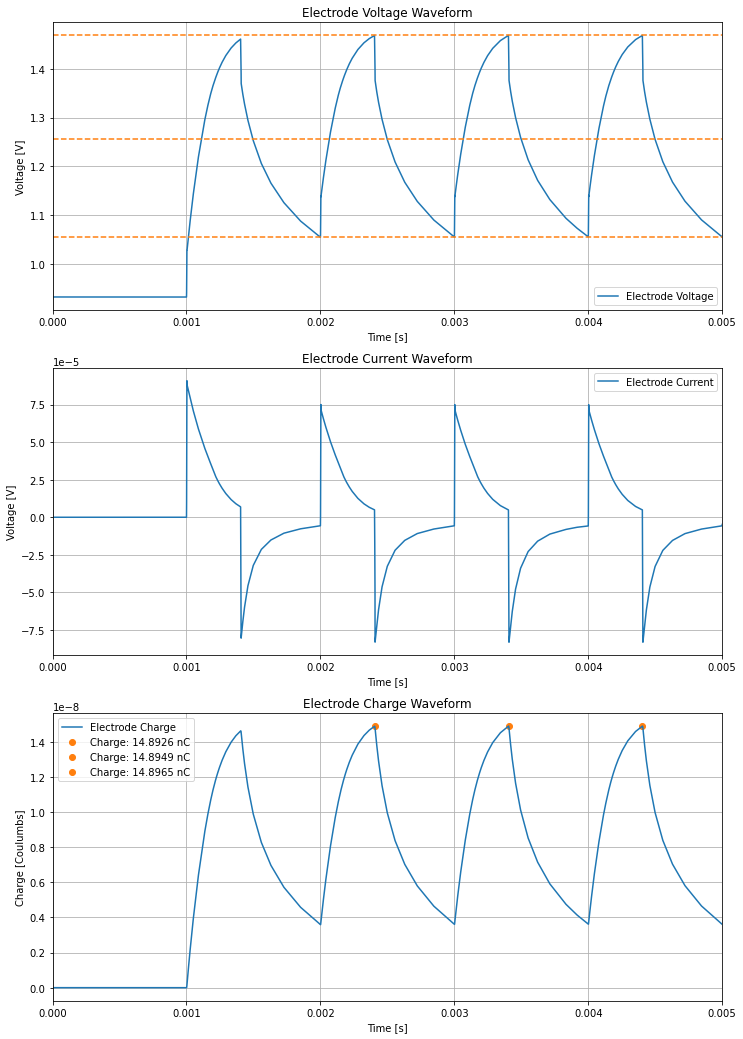

In [94]:
fig, ax = plt.subplots(3,1,figsize=(12,18))

ax[0].set_title('Electrode Voltage Waveform')
ax[0].plot(elect_waveform['/Vout X'],elect_waveform['/Vout Y'],label='Electrode Voltage')
ax[0].plot(elect_waveform['/Vout X'],np.ones(len(elect_waveform))*mmax,linestyle='--',color='tab:orange')
ax[0].plot(elect_waveform['/Vout X'],np.ones(len(elect_waveform))*mmed,linestyle='--',color='tab:orange')
ax[0].plot(elect_waveform['/Vout X'],np.ones(len(elect_waveform))*mmin,linestyle='--',color='tab:orange')
ax[0].set_ylabel('Voltage [V]')
ax[0].set_xlabel('Time [s]')
ax[0].set_xlim([0,5e-3])
#ax[0].ticklabel_format(axis="x", style="sci", scilimits=(-9,-9))
ax[0].grid(which='both', axis='both')
ax[0].legend()

ax[1].set_title('Electrode Current Waveform')
ax[1].plot(elect_curr['/V9/PLUS X'],elect_curr['/V9/PLUS Y'],label='Electrode Current')
#ax[1].plot(elect_curr['/V9/PLUS Y'],np.ones(len(elect_curr))*mmax,linestyle='--',color='tab:orange')
#ax[1].plot(elect_curr['/V9/PLUS Y'],np.ones(len(elect_curr))*mmed,linestyle='--',color='tab:orange')
#ax[1].plot(elect_curr['/V9/PLUS Y'],np.ones(len(elect_curr))*mmin,linestyle='--',color='tab:orange')
ax[1].set_ylabel('Voltage [V]')
ax[1].set_xlabel('Time [s]')
ax[1].set_xlim([0,5e-3])
#ax[1].ticklabel_format(axis="x", style="sci", scilimits=(-9,-9))
ax[1].grid(which='both', axis='both')
ax[1].legend()

ax[2].set_title('Electrode Charge Waveform')
ax[2].plot(elect_charge['iinteg(i("/R1/PLUS" ?result "tran")) X'],elect_charge['iinteg(i("/R1/PLUS" ?result "tran")) Y'],label='Electrode Charge')
ax[2].scatter(x[x0],y[x0],label=f'Charge: {charge0} nC',color='tab:orange')
ax[2].scatter(x[x1],y[x1],label=f'Charge: {charge1} nC',color='tab:orange')
ax[2].scatter(x[x2],y[x2],label=f'Charge: {charge2} nC',color='tab:orange')
ax[2].set_ylabel('Charge [Coulumbs]')
ax[2].set_xlabel('Time [s]')
ax[2].set_xlim([0,5e-3])
#ax[2].ticklabel_format(axis="x", style="sci", scilimits=(-9,-9))
ax[2].grid(which='both', axis='both')
ax[2].legend()

plt.show();

In [ ]:
14.98.65-14.8926

In [81]:
14.9865-14.9849

0.0015999999999998238